In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [337]:
route = './data/HISTORICO_SUERTES.xlsx'
df = pd.read_excel(route)

In [338]:
df_clean = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [339]:
df.head(3)

Período  Hacienda           Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493        LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284  UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203    EL AMPARO SAA  IP05      31.0    007  CORINTIAS    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN                   NaN                       NaN   
1                     NaN                   NaN                       NaN   
2                     NaN                   NaN                       NaN   

  Radicion Solar 0-3  Radiacion Solar Ciclo Precipitacion 0_3  \
0                NaN                    NaN               NaN   
1                NaN                    NaN               NaN   
2                NaN                    NaN               NaN   

   Precipitacion Ciclo  Evaporacion 0-3 Evaporacion Ciclo  
0                  NaN              NaN               NaN  
1                  NaN              NaN               NaN  
2                  NaN              NaN               NaN  

[3 rows x 85 columns]

#### **Inspección Inicial**

In [340]:
print("\n--- Estadísticas Descriptivas (Columnas Numéricas) ---")
print(df.describe())


--- Estadísticas Descriptivas (Columnas Numéricas) ---
             Período      Hacienda      Tenencia     Area Neta       Dist Km  \
count   21027.000000  21027.000000  21026.000000  21027.000000  21022.000000   
mean   202039.708708  80679.334427     46.448730      8.642948     25.311806   
min    201701.000000  80100.000000     11.000000      0.004000      1.100000   
25%    201812.000000  80247.000000     31.000000      3.310000     12.000000   
50%    202010.000000  80453.000000     51.000000      7.000000     21.900000   
75%    202209.000000  81104.000000     51.000000     12.075000     32.700000   
max    202407.000000  82557.000000     91.000000     65.000000    155.000000   
std       216.642895    590.030150     21.513498      7.049533     18.237344   

       Cod.Estado #                      F.Siembra  \
count  21027.000000                          21027   
mean       4.261806  2015-03-11 18:18:44.839492096   
min        0.000000            1986-04-30 00:00:00   
25%    

#### **Análisis de variables numéricas y categoricas**

In [341]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
print(NUMERICAL_FEATURES)

Index(['Período', 'Hacienda', 'Tenencia', 'Area Neta', 'Dist Km',
       'Cod.Estado #', 'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo',
       'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM',
       'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha',
       'Edad.Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM',
       '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix',
       'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego',
       'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3',
       'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC',
       '%Infest.Diatrea', 'Fosfato Jugo', 'Fert.Nitrogen.', 'Urea 46%', 'MEZ',
       'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S',
       'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ci

In [342]:
CATEGORICAL_FEATURES = df.select_dtypes(include=["object", "category"]).columns
print(CATEGORICAL_FEATURES)

Index(['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.',
       'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó',
       'Codigo Estacion'],
      dtype='object')


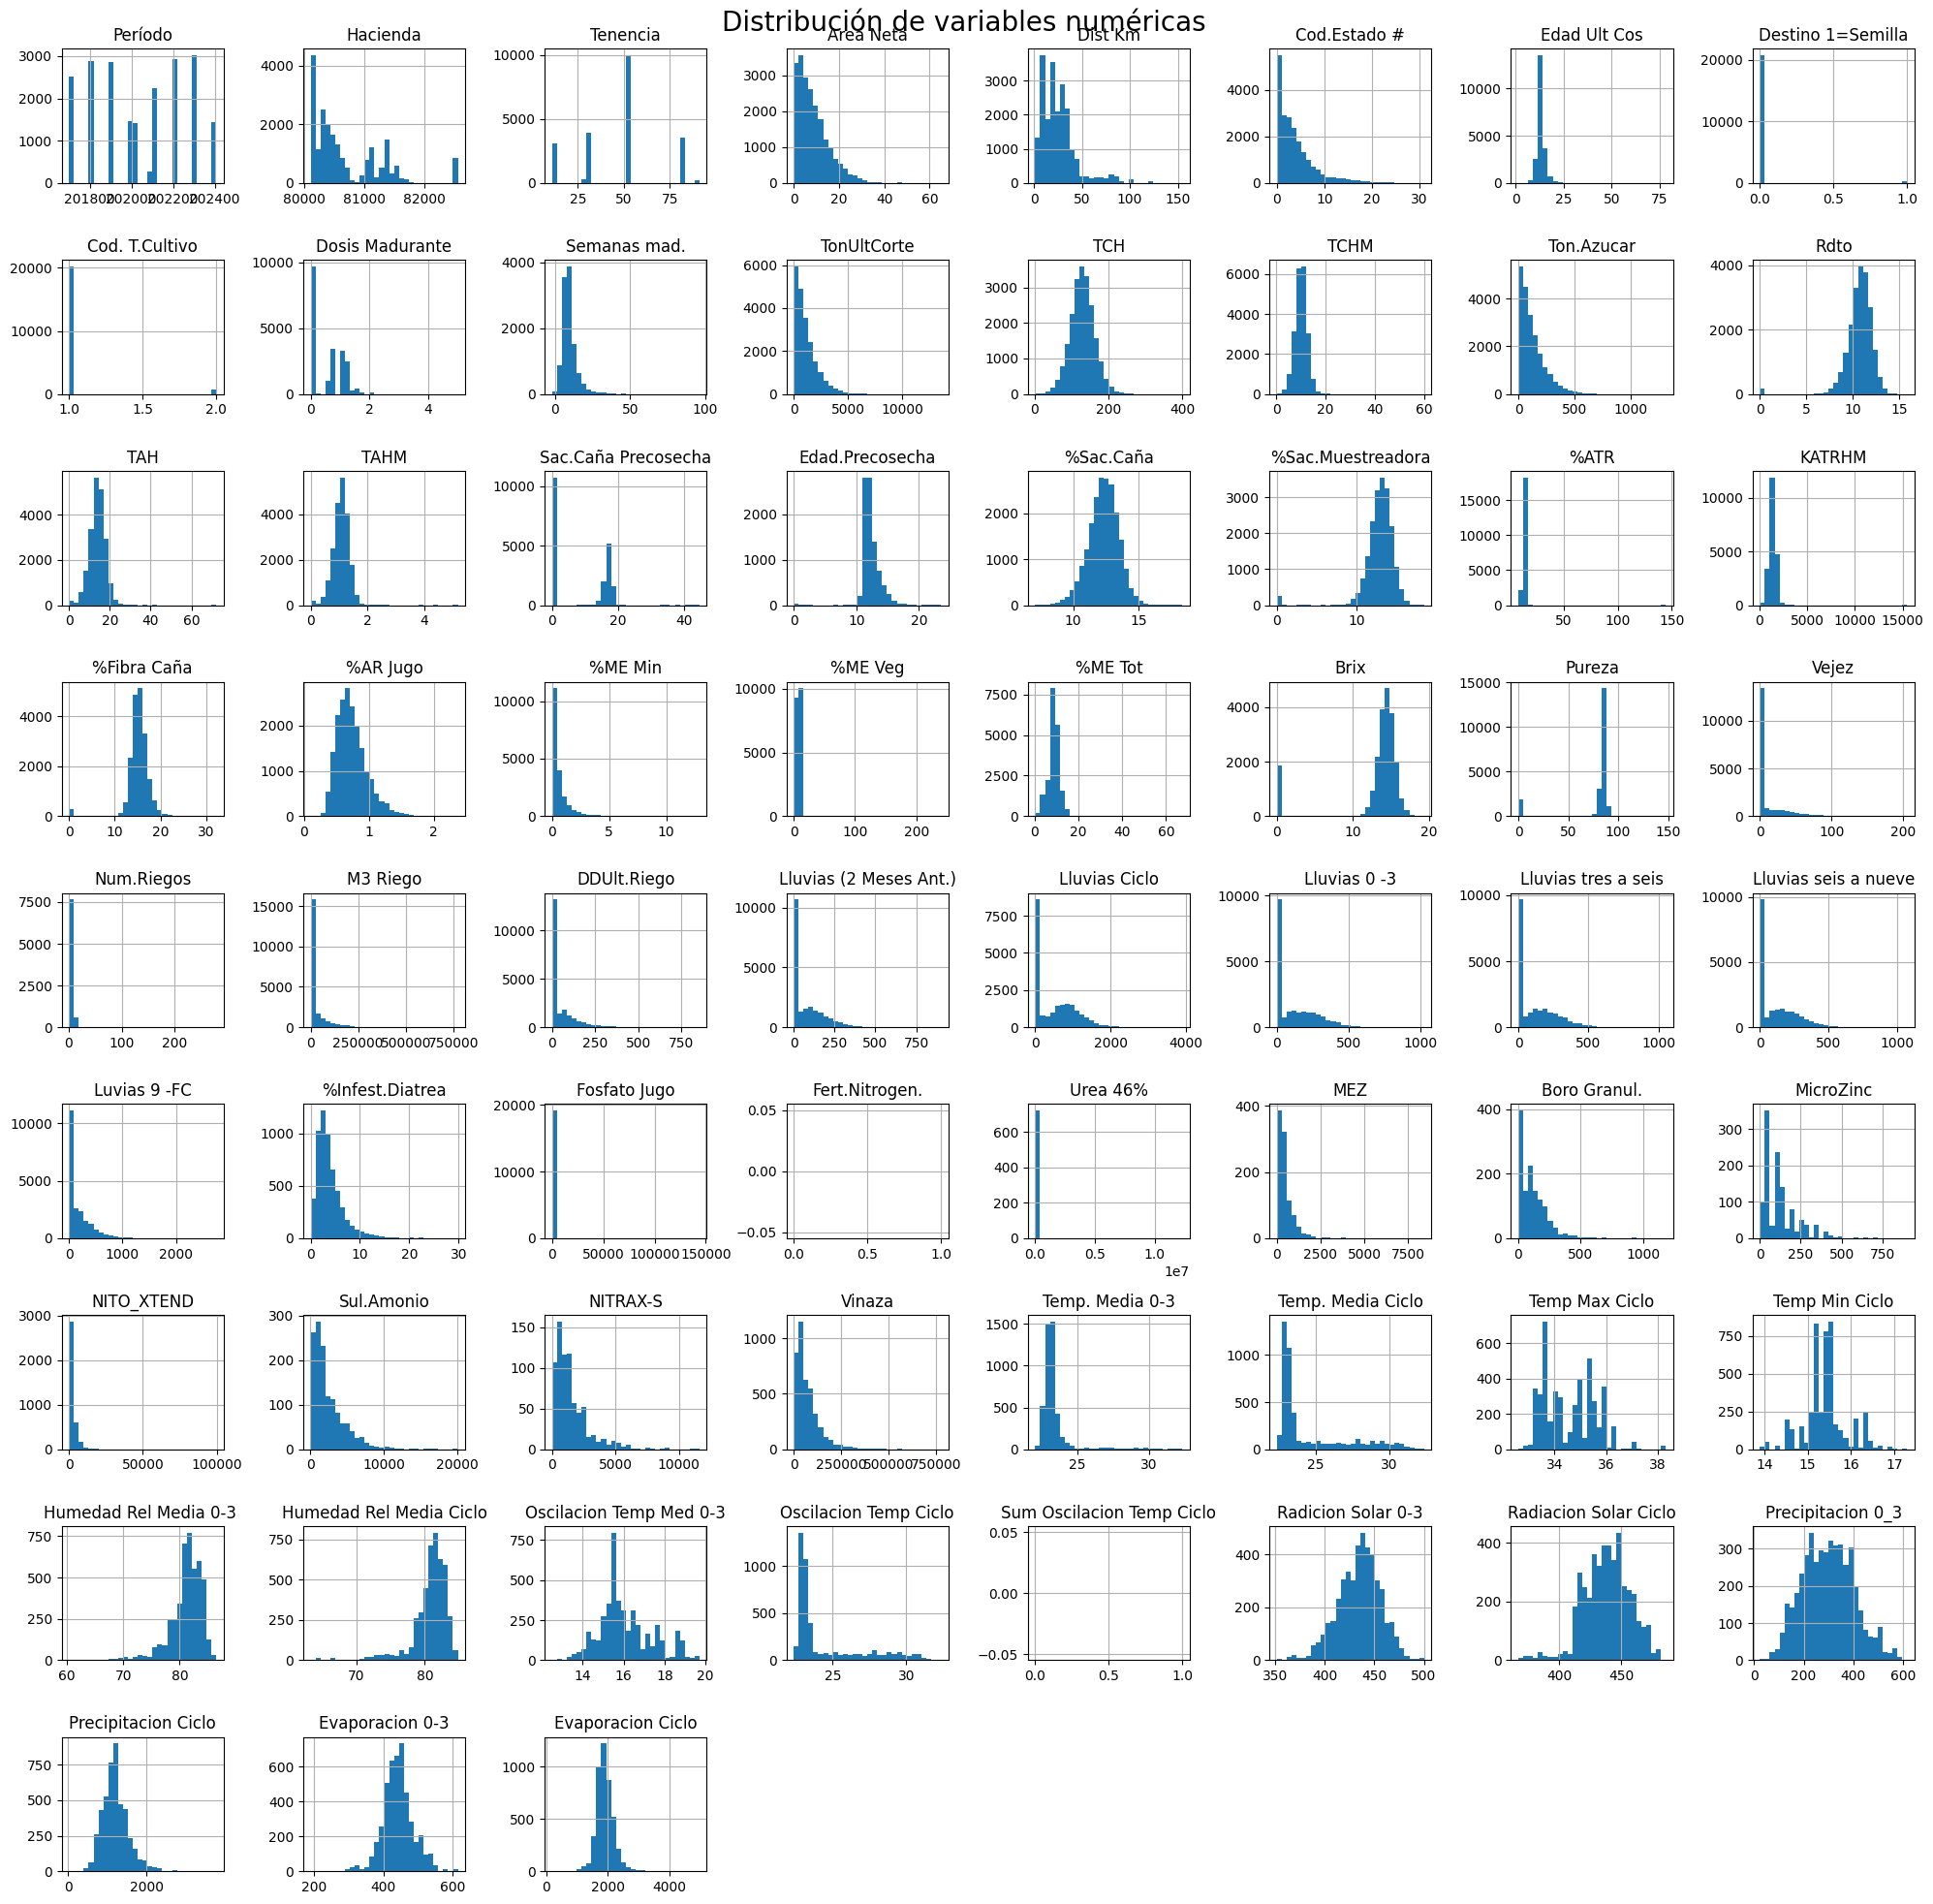

In [343]:
df[NUMERICAL_FEATURES].hist(
    bins=30,
    figsize=(20, 20),   
)
plt.suptitle("Distribución de variables numéricas", fontsize=20)
plt.tight_layout()
plt.show()

In [344]:
CATEGORICAL_CANDIDATES = ['Hacienda', 'Cod.Estado #', 'Cod. T.Cultivo', 'Destino 1=Semilla']
print(df[CATEGORICAL_CANDIDATES].head(10))

   Hacienda  Cod.Estado #  Cod. T.Cultivo  Destino 1=Semilla
0     80493             5             1.0                  0
1     81284             5             1.0                  0
2     80203             4             1.0                  0
3     81380             2             1.0                  0
4     80298             3             1.0                  0
5     80328             2             1.0                  0
6     80194             4             1.0                  0
7     80203             4             1.0                  0
8     80942             1             1.0                  0
9     81311             1             1.0                  0


#### **Porcentaje de Nulos**

In [345]:
null_percent = df.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

Sum Oscilacion Temp Ciclo    100.000000
Fert.Nitrogen.               100.000000
Urea 46%                      96.561564
NITRAX-S                      96.442669
MEZ                           95.382128
MicroZinc                     94.535597
Boro Granul.                  93.888810
Sul.Amonio                    93.546393
NITO_XTEND                    82.503448
Vinaza                        80.510772
Humedad Rel Media Ciclo       78.456271
Temp. Media 0-3               78.456271
Oscilacion Temp Med 0-3       78.456271
Temp. Media Ciclo             78.456271
Temp Max Ciclo                78.456271
Humedad Rel Media 0-3         78.456271
Radiacion Solar Ciclo         78.456271
Evaporacion 0-3               78.456271
Precipitacion Ciclo           78.456271
Evaporacion Ciclo             78.456271
Temp Min Ciclo                78.456271
Oscilacion Temp Ciclo         78.456271
Radicion Solar 0-3            78.456271
Precipitacion 0_3             78.456271
%Infest.Diatrea               73.367575


#### **Columnas Vacías**

Eliminamos columnas vacías del Df y aquellas que generan mucho ruido (HACIENDA), identificadores de cada hacienda. 


In [346]:
COLUMNS_TO_DROP = ['Sum Oscilacion Temp Ciclo', 'Fert.Nitrogen.', 'Hacienda']
df = df.drop(columns = COLUMNS_TO_DROP)

#### **Chem Features**

Se observan columnas con porcentajes de nulos demasiado altos [99% - 80%]. Parecen columnas relacionadas a productos o químicos que se utilizaron en la plantación, su ausencia podría indicar que el producto no se usó. Se imputarán con 0's. 


In [347]:
CHEM_FEATURES = ['Urea 46%', 'NITRAX-S', 'MEZ', 'NITO_XTEND', 'Vinaza', 'MicroZinc', 'Boro Granul.', 'Sul.Amonio']
df[CHEM_FEATURES] = df[CHEM_FEATURES].fillna(0)

In [348]:
null_percent = df.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(10)

Precipitacion Ciclo        78.456271
Precipitacion 0_3          78.456271
Temp Max Ciclo             78.456271
Temp Min Ciclo             78.456271
Oscilacion Temp Med 0-3    78.456271
Oscilacion Temp Ciclo      78.456271
Radiacion Solar Ciclo      78.456271
Radicion Solar 0-3         78.456271
Evaporacion Ciclo          78.456271
Evaporacion 0-3            78.456271
dtype: float64

#### **Weather Features - Variables Climaticas**
Se observa un porcentaje en común con variables relacionadas con condiciones climáticas (78.456271%) por esa razón, se procede a agruparlas en la categoría de weather features. Por el momento se dejan agrupadas

In [349]:
WEATHER_FEATURES = ['Humedad Rel Media Ciclo', 'Temp. Media 0-3', 'Oscilacion Temp Med 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Humedad Rel Media 0-3 ', 'Radiacion Solar Ciclo', 'Evaporacion 0-3', 'Precipitacion Ciclo', 'Evaporacion Ciclo', 'Temp Min Ciclo', 'Oscilacion Temp Ciclo', 'Radicion Solar 0-3', 'Precipitacion 0_3']

#### **Analisis de Correlaciones**

Matrices de correlación orientadas a **variables objetivo** y general

In [350]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
print(NUMERICAL_FEATURES)

Index(['Período', 'Tenencia', 'Area Neta', 'Dist Km', 'Cod.Estado #',
       'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo',
       'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM',
       'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha',
       'Edad.Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM',
       '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix',
       'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego',
       'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3',
       'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC',
       '%Infest.Diatrea', 'Fosfato Jugo', 'Urea 46%', 'MEZ', 'Boro Granul.',
       'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S', 'Vinaza',
       'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo',
       'Radicion Solar 0

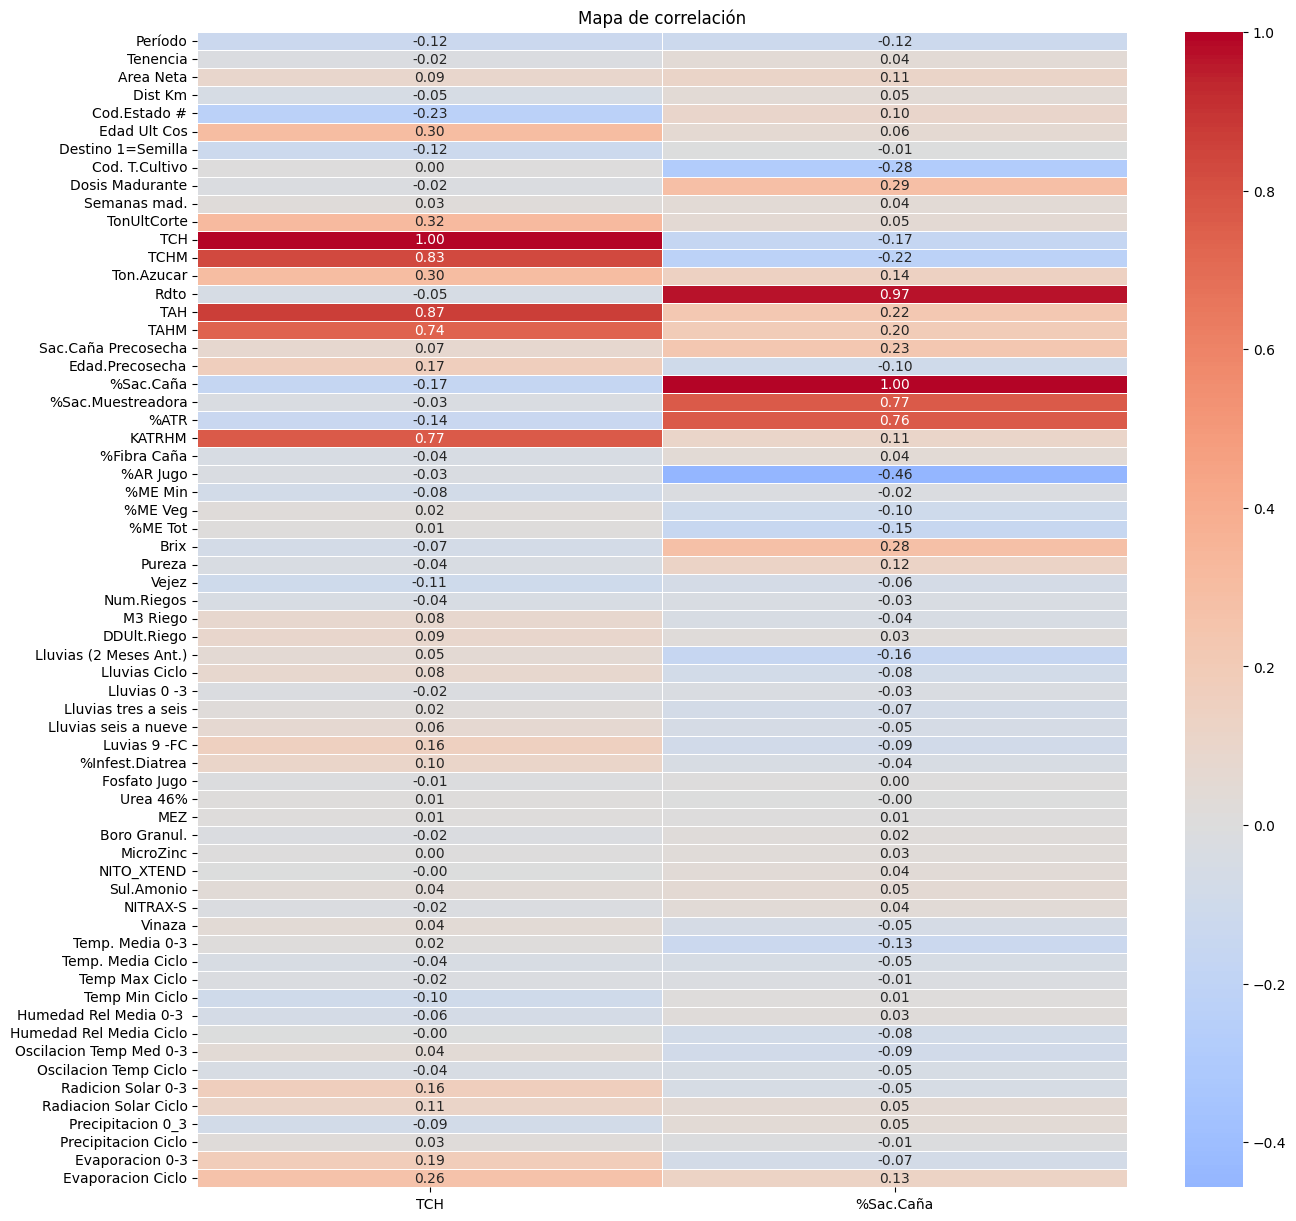

In [351]:
plt.figure(figsize=(15,15))
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
sns.heatmap(numerical_corr[["TCH", "%Sac.Caña"]], 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

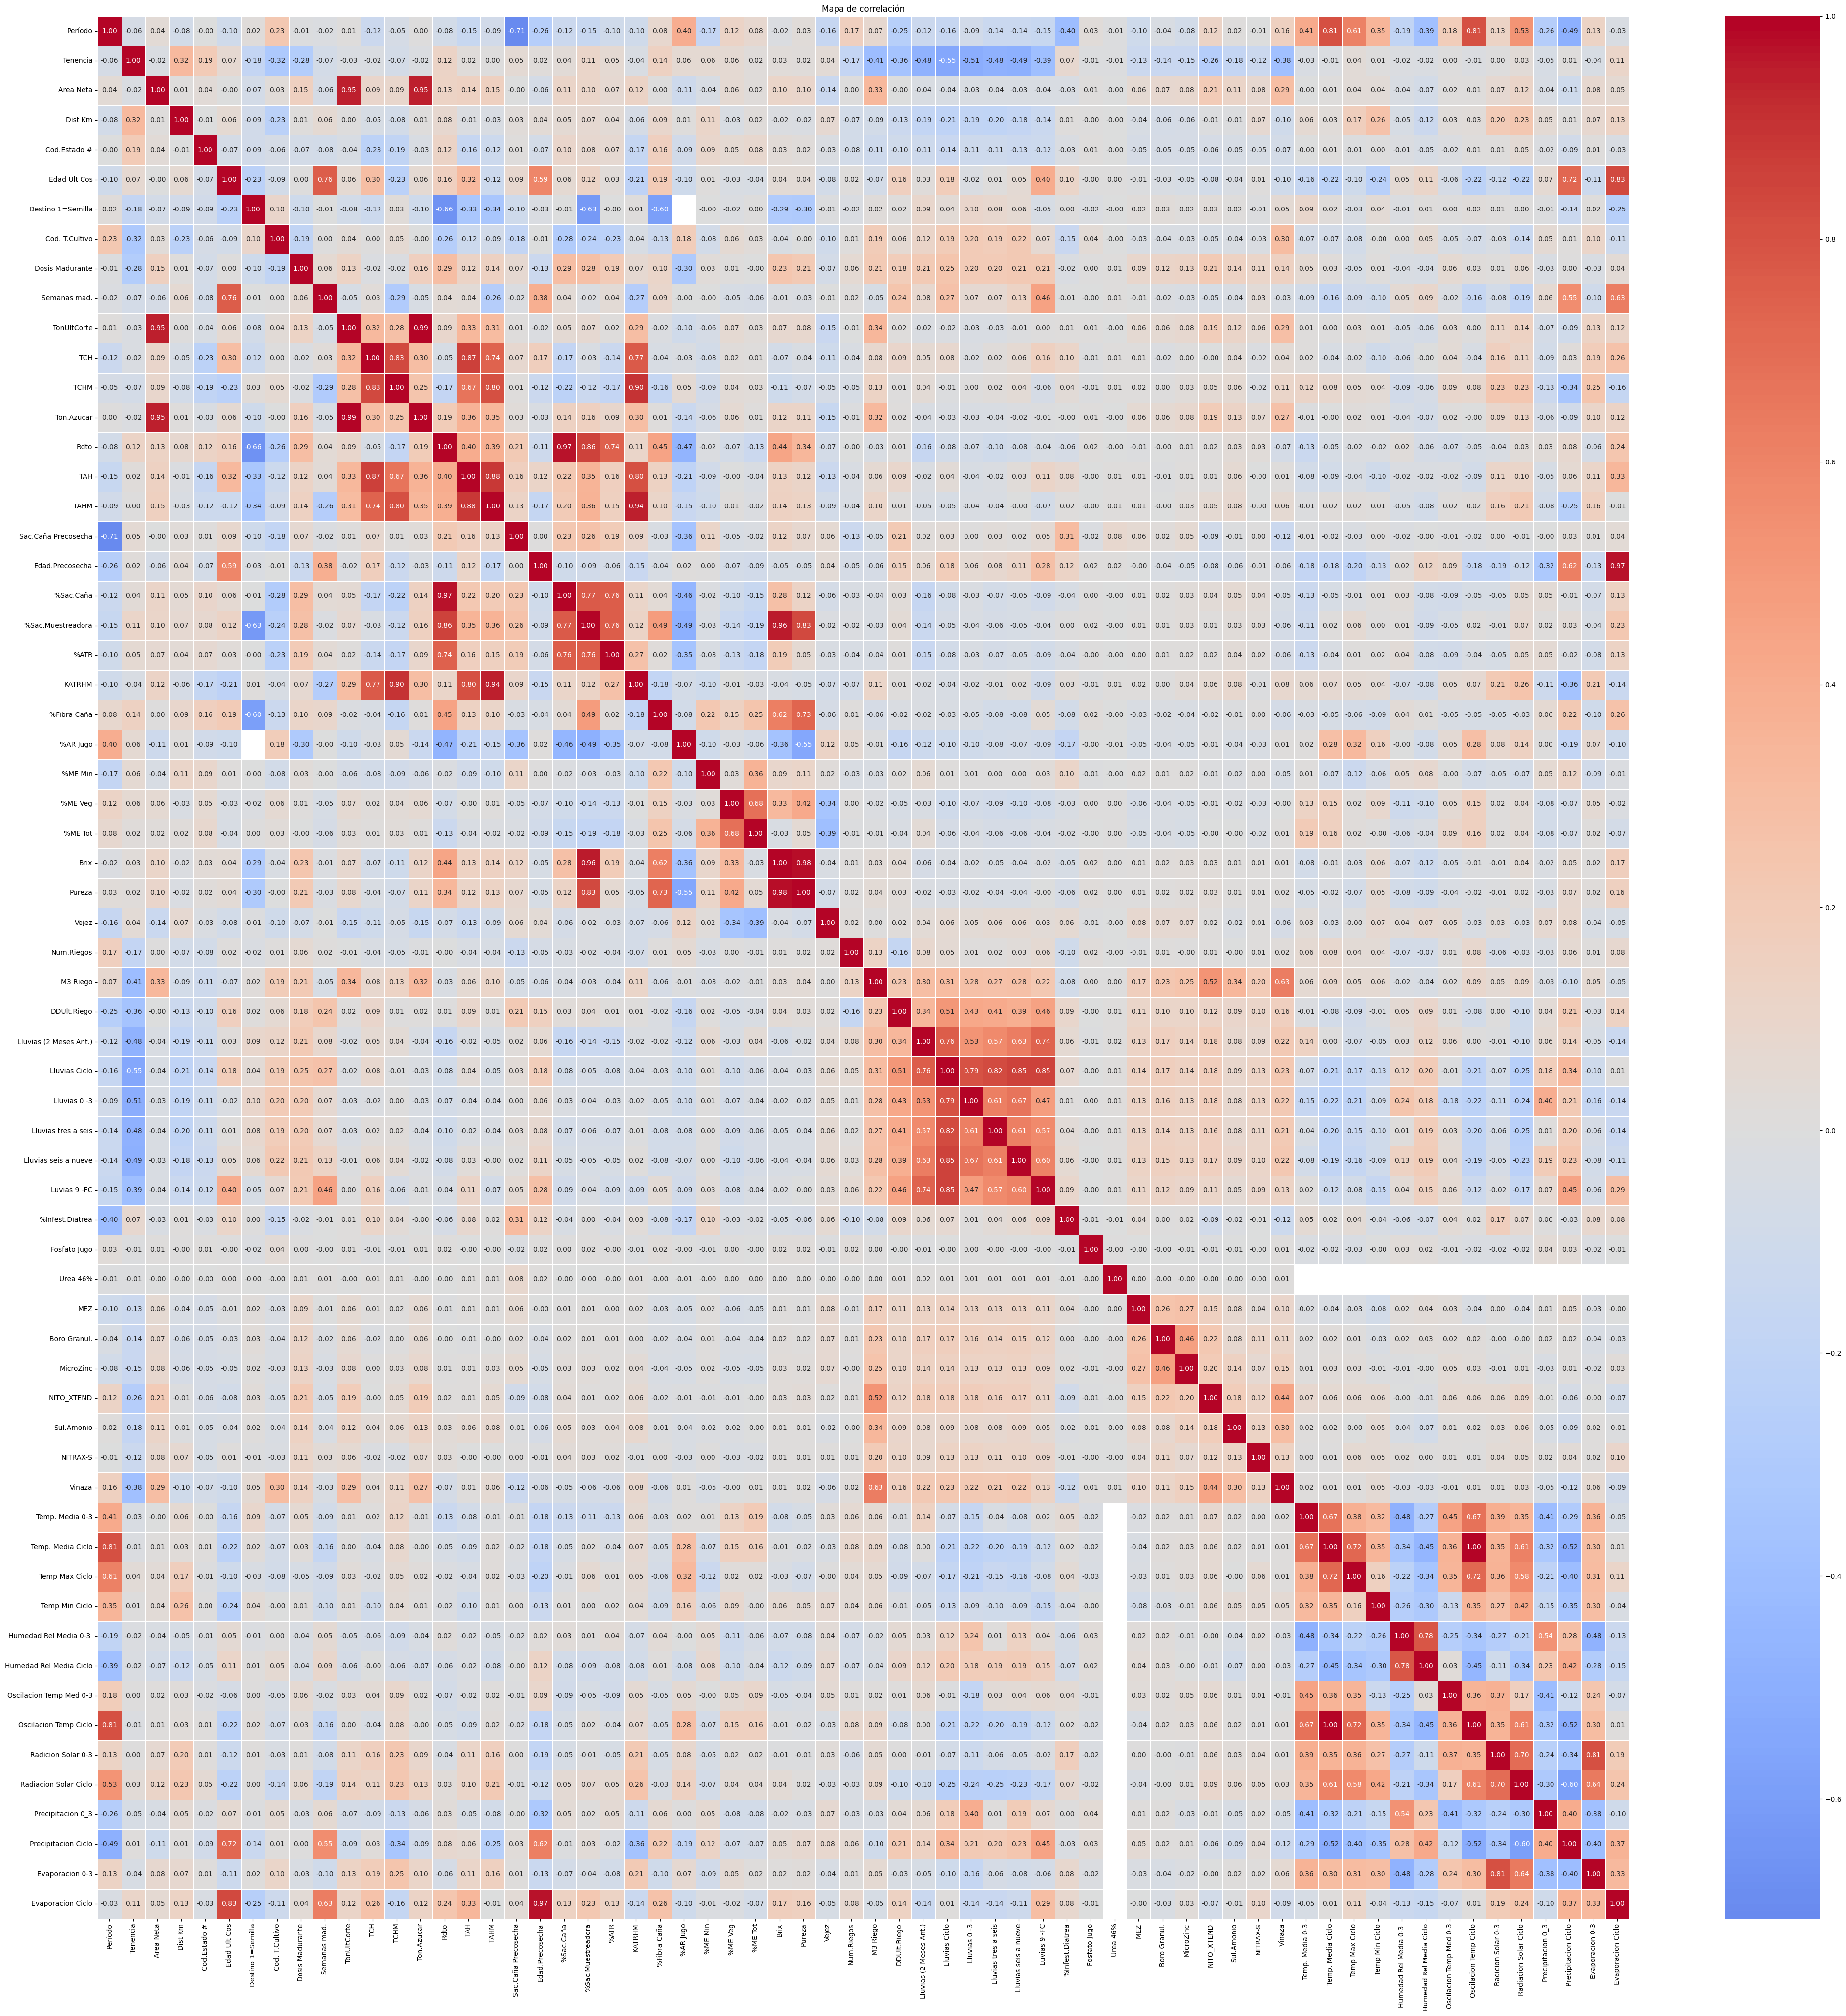

In [352]:
## Subset 
plt.figure(figsize=(50,50))
sns.heatmap(numerical_corr, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

Posible multicolinealidad entre: 
- `TCH` y `TCHM` 
- `TAH` y `TAHM`
- `Brix` y `Pureza`
- `Edad precosecha` y `Evaporación Ciclo`
- `Oscilación Temp Ciclo` y `Temp Media Ciclo`

Se sugiere eliminar además variables que están altamente correlacionadas con la variable objetivo, posiblemente porque son métricas que se tomaron ya luego del cultivo, variables resultado. 

#### **Data Leakage**

In [353]:
LEAKAGE = [
    'TCHM','Ton.Azucar','Rdto','TAH','TAHM',
    '%Sac.Muestreadora','%ATR','KATRHM','Brix','Pureza',
    '%AR Jugo','%Fibra Caña','Sac.Caña Precosecha','%ME Min','%ME Veg','%ME Tot',
    'TonUltCorte', 'Fosfato Jugo'
]

In [354]:
df_mod = df.drop(columns=LEAKAGE)

#### **Irrigation Features**

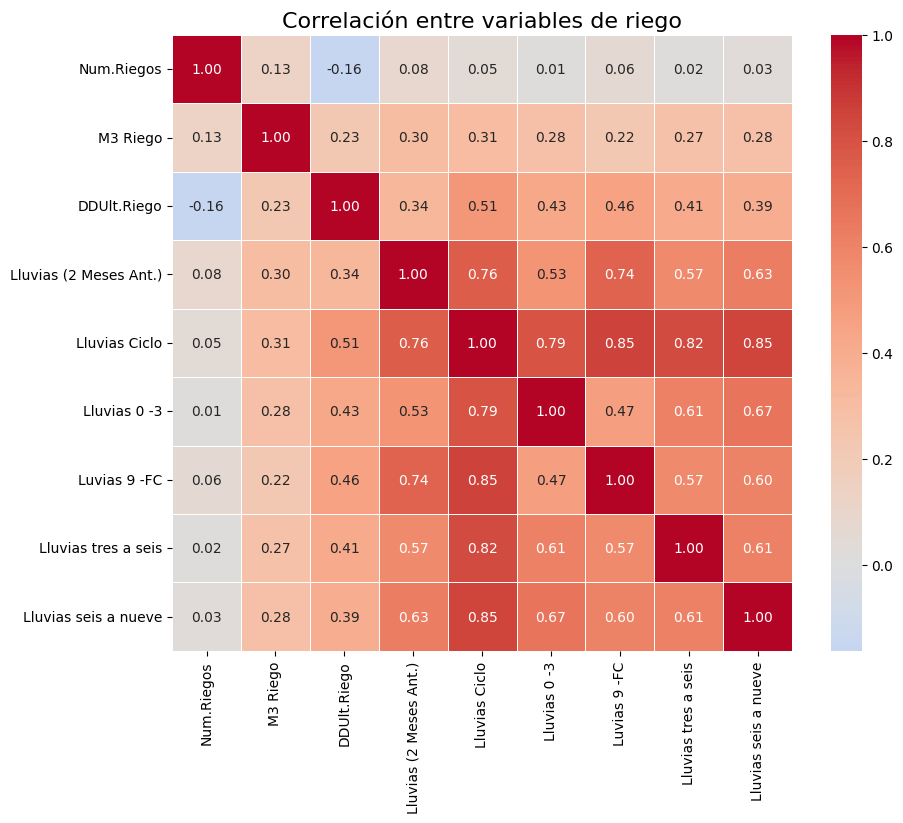

In [355]:
NUMERICAL_FEATURES = df_mod.select_dtypes(include=["int64", "float64"]).columns
IRRIG_FEATURES = ['Num.Riegos', 'M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Luvias 9 -FC', 'Lluvias tres a seis', 'Lluvias seis a nueve']
corr_matrix_irrig = df_mod[IRRIG_FEATURES].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_irrig, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Correlación entre variables de riego", fontsize=16)
plt.show()

In [356]:
df_mod = df_mod.drop(columns = ['Lluvias (2 Meses Ant.)', 'Lluvias 0 -3', 'Luvias 9 -FC', 'Lluvias tres a seis', 'Lluvias seis a nueve'])

#### **Correlación en variables del clima**

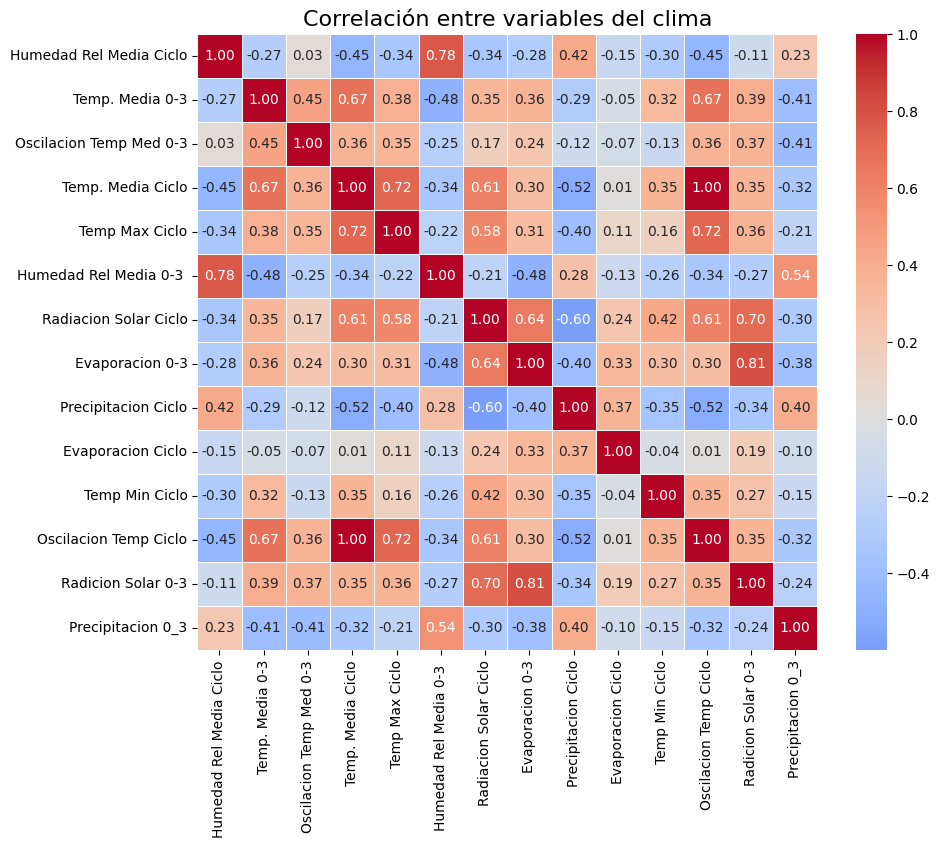

In [357]:
corr_matrix_weather = df_mod[WEATHER_FEATURES].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_weather, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Correlación entre variables del clima", fontsize=16)
plt.show()

In [358]:
WEATHER_FEATURES = ['Humedad Rel Media Ciclo', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Radiacion Solar Ciclo', 'Precipitacion Ciclo', 'Evaporacion Ciclo', 'Temp Min Ciclo']
df_mod = df_mod.drop(columns = ['Oscilacion Temp Ciclo'])
df_mod = df_mod.drop(columns = ['Oscilacion Temp Med 0-3', 'Humedad Rel Media 0-3 ', 'Evaporacion 0-3', 'Radicion Solar 0-3', 'Precipitacion 0_3'])

Se elimina Oscilacion Temp Ciclo debido a que comparte la misma correlación con Temp. Media Ciclo, es decir, son la misma variable o tienen los mismos registros. 

#### **Estudio de subset del clima**  
Se extrae solo aquellos registros con variables del clima. 

In [359]:
df_conclima = df_mod.dropna(subset=WEATHER_FEATURES)

In [360]:
df_conclima.shape

(4530, 53)

In [361]:
null_percent = df_conclima.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

Edad.Precosecha            99.713024
%Infest.Diatrea            65.165563
Num.Riegos                 57.152318
Ult.Riego                  57.130243
D.S.                       54.481236
Semanas mad.               50.883002
Producto                   50.883002
Fec.Madur.                 50.883002
Vejez                       5.165563
Suelo                       4.459161
%Sac.Caña                   3.465784
Dosis Madurante             0.176600
Suerte                      0.000000
F.Siembra                   0.000000
Tenencia                    0.000000
Zona                        0.000000
Nombre                      0.000000
Período                     0.000000
Variedad                    0.000000
Dist Km                     0.000000
Area Neta                   0.000000
Cod. T.Cultivo              0.000000
Cultivo                     0.000000
F.Ult.Corte                 0.000000
Destino 1=Semilla           0.000000
Edad Ult Cos                0.000000
Cod.Estado #                0.000000
C

In [362]:
df_conclima = df_conclima.drop(columns=['Edad.Precosecha'])

In [363]:
null_percent = df_conclima.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

%Infest.Diatrea            65.165563
Num.Riegos                 57.152318
Ult.Riego                  57.130243
D.S.                       54.481236
Semanas mad.               50.883002
Producto                   50.883002
Fec.Madur.                 50.883002
Vejez                       5.165563
Suelo                       4.459161
%Sac.Caña                   3.465784
Dosis Madurante             0.176600
Tenencia                    0.000000
F.Siembra                   0.000000
Zona                        0.000000
Nombre                      0.000000
Período                     0.000000
Variedad                    0.000000
Suerte                      0.000000
Area Neta                   0.000000
Dist Km                     0.000000
Cultivo                     0.000000
Cod. T.Cultivo              0.000000
Destino 1=Semilla           0.000000
F.Ult.Corte                 0.000000
Edad Ult Cos                0.000000
Cod.Estado #                0.000000
Cod.Estado                  0.000000
T

In [364]:
## % Infestación se crea variable dummy 
df_conclima['diatrea_measured'] = df_conclima["%Infest.Diatrea"].notna().astype(int)
## Imputar NaN por 0 
df_conclima['%Infest.Diatrea'] = df_conclima['%Infest.Diatrea'].fillna(0)

In [365]:
## % Infestación se crea variable dummy 
df_conclima['riegos_measured'] = df_conclima["Num.Riegos"].notna().astype(int)
## Imputar NaN por 0 
df_conclima['Num.Riegos'] = df_conclima['Num.Riegos'].fillna(0)
df_conclima = df_conclima.drop(columns=['Ult.Riego'])

In [366]:
null_percent = df_conclima.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

D.S.                       54.481236
Producto                   50.883002
Fec.Madur.                 50.883002
Semanas mad.               50.883002
Vejez                       5.165563
Suelo                       4.459161
%Sac.Caña                   3.465784
Dosis Madurante             0.176600
Suerte                      0.000000
Período                     0.000000
Tenencia                    0.000000
Zona                        0.000000
Nombre                      0.000000
F.Siembra                   0.000000
Cod.Estado                  0.000000
Cod.Estado #                0.000000
Edad Ult Cos                0.000000
Cod. T.Cultivo              0.000000
Variedad                    0.000000
Dist Km                     0.000000
Area Neta                   0.000000
Cultivo                     0.000000
F.Ult.Corte                 0.000000
Destino 1=Semilla           0.000000
TCH                         0.000000
Tipo Quema                  0.000000
T.Corte                     0.000000
C

In [367]:
df_conclima = df_conclima.drop(columns = ['D.S.'])

In [368]:
df_conclima["Producto"] = df_conclima["Producto"].fillna("Sin producto")

df_conclima["Producto"] = df_conclima["Producto"].apply(
    lambda x: "BONUS" if x == "BONUS 250 EC REGULADOR FISIOLOGICO"
    else ("Sin producto" if x == "Sin producto" else "Otros")
)

In [369]:
mediana_vejez = df_conclima["Vejez"].median()
df_conclima["Vejez"] = df_conclima["Vejez"].fillna(mediana_vejez)

In [370]:
df_conclima["Suelo"] = df_conclima["Suelo"].fillna("Desconocido")

In [371]:
mediana_sac = df_conclima["%Sac.Caña"].median()
df_conclima["%Sac.Caña"] = df_conclima["%Sac.Caña"].fillna(mediana_sac)

In [372]:
median_dosis = df_conclima['Dosis Madurante'].median()
df_conclima['Dosis Madurante'] = df_conclima['Dosis Madurante'].fillna(median_dosis)

In [373]:
null_percent = df_conclima.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

Fec.Madur.                 50.883002
Semanas mad.               50.883002
Zona                        0.000000
Período                     0.000000
Tenencia                    0.000000
Suerte                      0.000000
Area Neta                   0.000000
Suelo                       0.000000
Variedad                    0.000000
Cod.Estado #                0.000000
Cod.Estado                  0.000000
Dist Km                     0.000000
F.Siembra                   0.000000
Edad Ult Cos                0.000000
Destino 1=Semilla           0.000000
F.Ult.Corte                 0.000000
Cod. T.Cultivo              0.000000
Cultivo                     0.000000
Producto                    0.000000
Nombre                      0.000000
Dosis Madurante             0.000000
TCH                         0.000000
%Sac.Caña                   0.000000
Vejez                       0.000000
Tipo Quema                  0.000000
T.Corte                     0.000000
Cerca de                    0.000000
C

In [374]:
df_conclima = df_conclima.drop(columns = ['Nombre', 'Suerte', 'Codigo Estacion'])

In [375]:
umbral_zona = 300  
zonas_comunes = df_conclima['Zona'].value_counts()[df_conclima['Zona'].value_counts() >= umbral_zona].index
df_conclima['Zona'] = df_conclima['Zona'].apply(lambda x: x if x in zonas_comunes else "Otros")

In [376]:
umbral_cod = 50 
cod_comunes = df_conclima['Cod.Estado'].value_counts()[df_conclima['Cod.Estado'].value_counts() >= umbral_cod].index
df_conclima['Cod.Estado'] = df_conclima['Cod.Estado'].apply(lambda x: x if x in cod_comunes else "Otros")

In [377]:
umbral_frac = 0.01   # 1% del dataset
umbral = int(umbral_frac * len(df_conclima))

frecuencias = df_conclima['Suelo'].value_counts()
categorias_comunes = frecuencias[frecuencias >= umbral].index

df_conclima['Suelo'] = df_conclima['Suelo'].apply(
    lambda x: x if x in categorias_comunes else "Otros"
)

In [378]:
df_conclima = df_conclima.drop(columns = ['Cod.Estado #'])

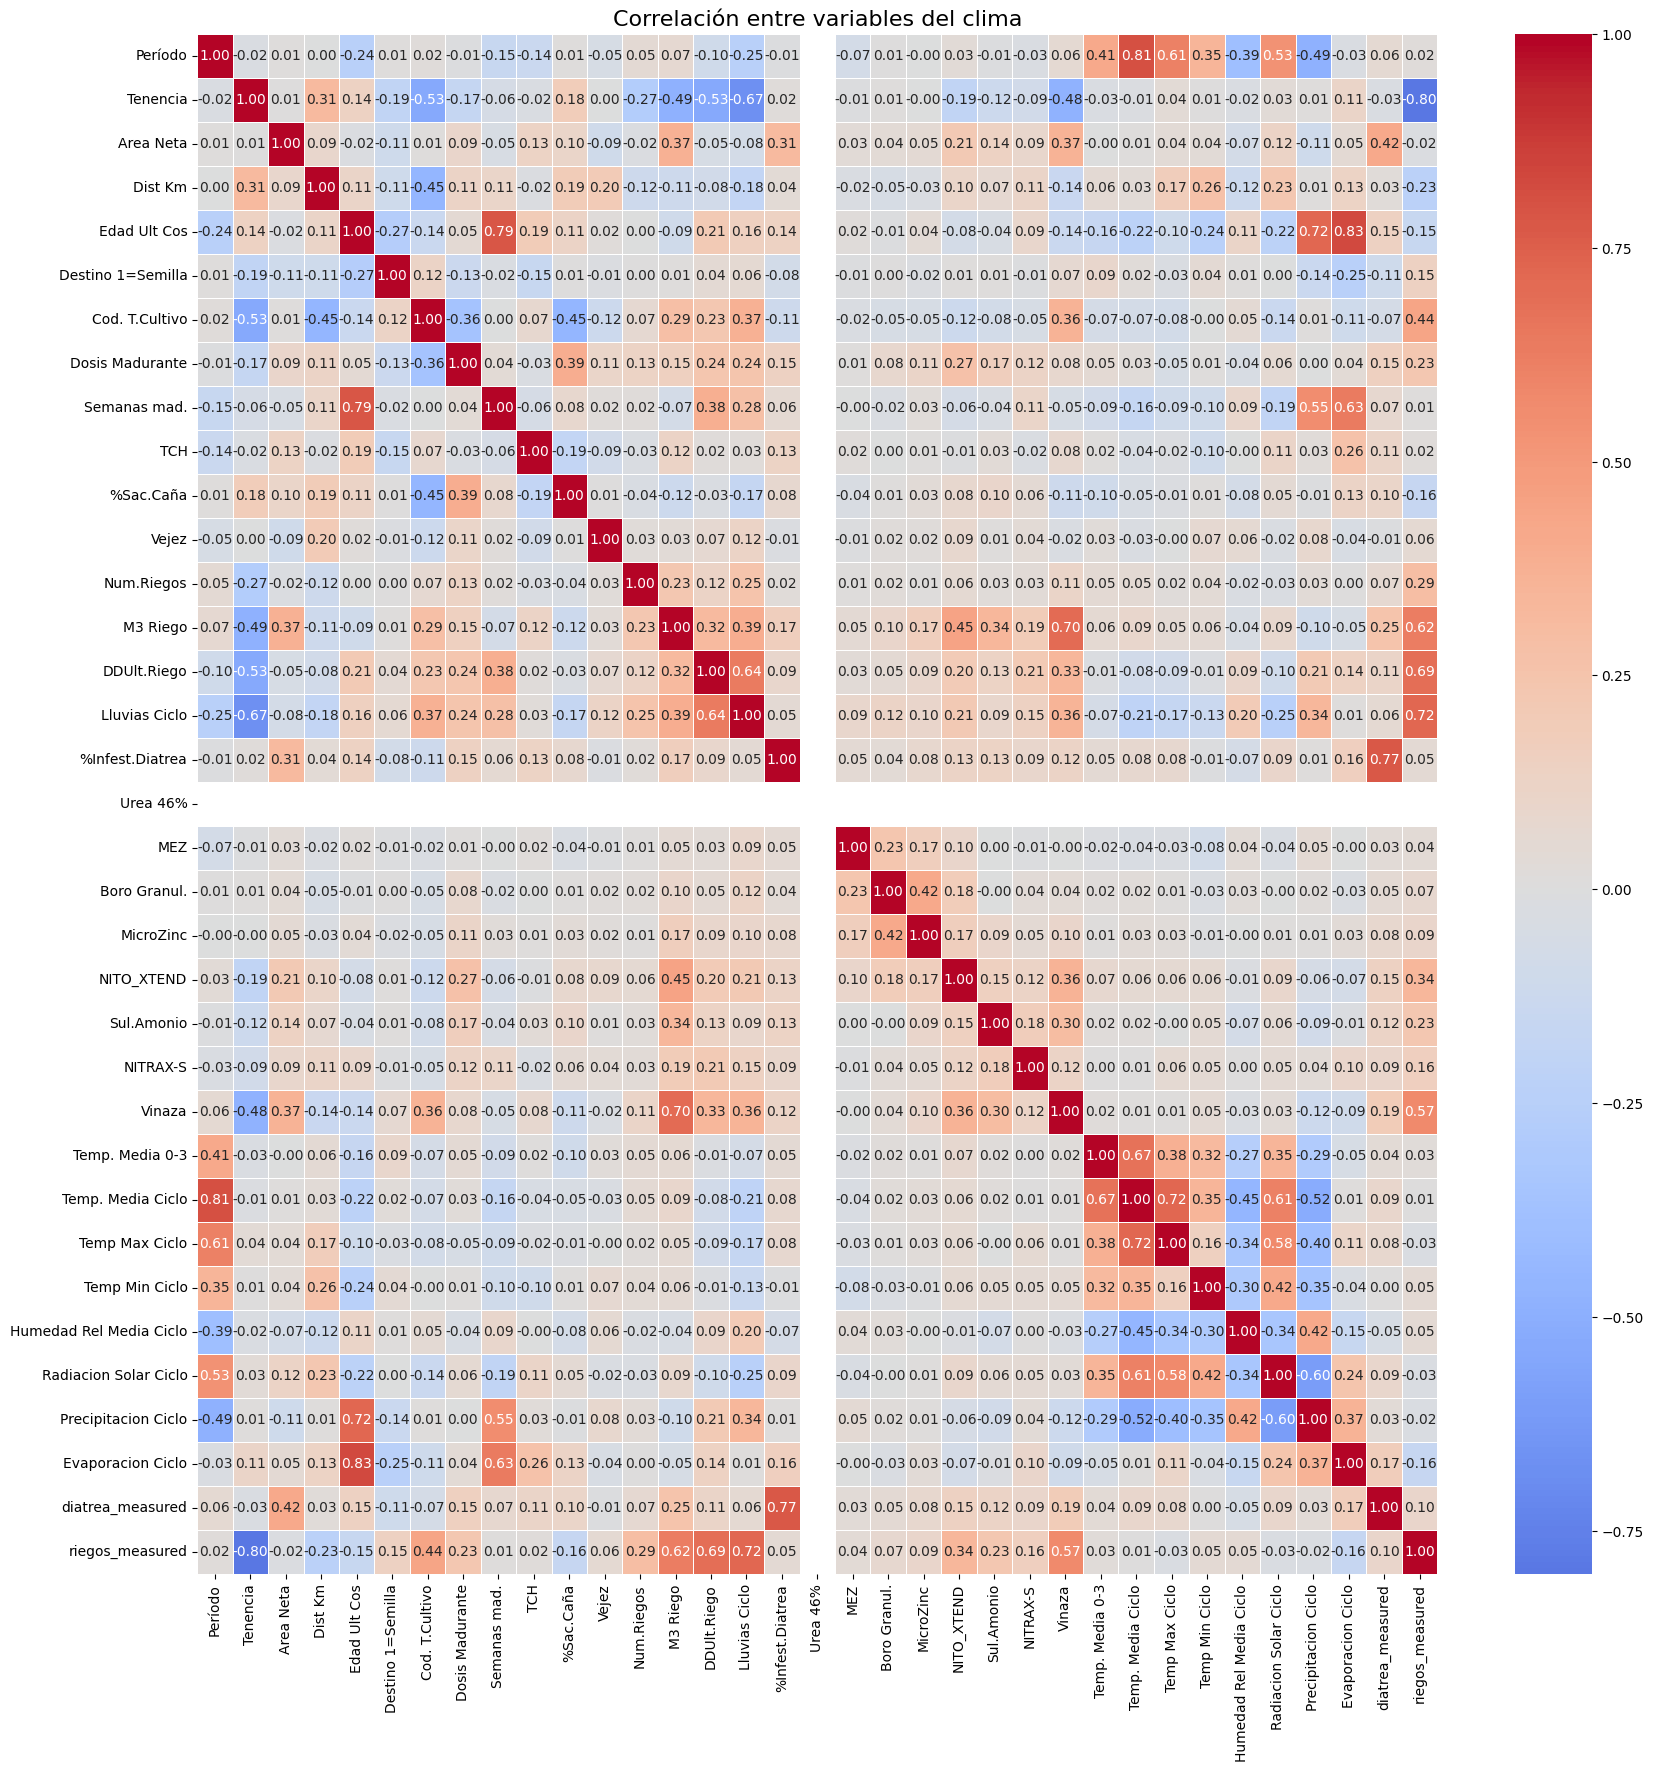

In [379]:
NUMERICAL_FEATURES = df_conclima.select_dtypes(include=["int64", "float64"]).columns
corr_matrix_gen = df_conclima[NUMERICAL_FEATURES].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix_gen, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Correlación entre variables del clima", fontsize=16)
plt.show()

---
## **Modelos de Regresión para TCH**

In [380]:
from sklearn.model_selection import train_test_split

X = df_conclima.drop(['TCH', '%Sac.Caña'], axis = 1)
y = df_conclima['TCH']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)


In [381]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

print("Numéricas:", len(numerical_features))
print("Categóricas:", len(categorical_features))

# ======================
# 3. Transformadores
# ======================
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ======================
# 4. Pipelines
# ======================

# (a) Solo numéricas
preprocessor_num = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features)
    ]
)

pipeline_lr_num = Pipeline(steps=[
    ('preprocessor', preprocessor_num),
    ('regressor', LinearRegression())
])

# (b) Numéricas + categóricas
preprocessor_all = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline_lr_all = Pipeline(steps=[
    ('preprocessor', preprocessor_all),
    ('regressor', LinearRegression())
])

# ======================
# 5. Validación cruzada
# ======================

print("\n--- Regresión Lineal SOLO Numéricas ---")
cv_scores_num_mse = -cross_val_score(pipeline_lr_num, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_num_r2 = cross_val_score(pipeline_lr_num, X_train, y_train, cv=5, scoring='r2')
print(f"MSE promedio: {np.mean(cv_scores_num_mse):.4f} (+/- {np.std(cv_scores_num_mse):.4f})")
print(f"R^2 promedio: {np.mean(cv_scores_num_r2):.4f} (+/- {np.std(cv_scores_num_r2):.4f})")

print("\n--- Regresión Lineal Numéricas + Categóricas ---")
cv_scores_all_mse = -cross_val_score(pipeline_lr_all, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_all_r2 = cross_val_score(pipeline_lr_all, X_train, y_train, cv=5, scoring='r2')
print(f"MSE promedio: {np.mean(cv_scores_all_mse):.4f} (+/- {np.std(cv_scores_all_mse):.4f})")
print(f"R^2 promedio: {np.mean(cv_scores_all_r2):.4f} (+/- {np.std(cv_scores_all_r2):.4f})")

Numéricas: 33
Categóricas: 10

--- Regresión Lineal SOLO Numéricas ---
MSE promedio: 766.1932 (+/- 40.7204)
R^2 promedio: 0.1991 (+/- 0.0345)

--- Regresión Lineal Numéricas + Categóricas ---
MSE promedio: 600.7918 (+/- 52.3428)
R^2 promedio: 0.3722 (+/- 0.0479)


#### **Lasso Y Ridge**: Solo variables numericas

In [382]:
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor_num),
                                 ('regressor', Ridge())])

pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor_num),
                                 ('regressor', Lasso())]) 

# ======================
# 5. GridSearch
# ======================
param_grid = {'regressor__alpha': np.logspace(-4, 2, 100)}

# Ridge
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=5,
                                 scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Lasso
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=5,
                                 scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

# ======================
# 6. Resultados
# ======================
print(f"\n--- Ridge (L2) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_ridge.best_estimator_.score(X_train, y_train):.4f}")

print(f"\n--- Lasso (L1) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_lasso.best_estimator_.score(X_train, y_train):.4f}")


--- Ridge (L2) con GridSearchCV ---
Mejor alpha: 32.7455
Mejor MSE (CV): 765.8630
Mejor R² (CV): 0.2179

--- Lasso (L1) con GridSearchCV ---
Mejor alpha: 0.0705
Mejor MSE (CV): 765.8520
Mejor R² (CV): 0.2177


#### **Lasso Y Ridge**: todas las variables

In [383]:
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor_all),
                                 ('regressor', Ridge())])

pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor_all),
                                 ('regressor', Lasso())]) 

# ======================
# 5. GridSearch
# ======================
param_grid = {'regressor__alpha': np.logspace(-4, 2, 100)}

# Ridge
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=3,
                                 scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Lasso
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=3,
                                 scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

# ======================
# 6. Resultados
# ======================
print(f"\n--- Ridge (L2) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_ridge.best_estimator_.score(X_train, y_train):.4f}")

print(f"\n--- Lasso (L1) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_lasso.best_estimator_.score(X_train, y_train):.4f}")


--- Ridge (L2) con GridSearchCV ---
Mejor alpha: 8.1113
Mejor MSE (CV): 597.3114
Mejor R² (CV): 0.4276

--- Lasso (L1) con GridSearchCV ---
Mejor alpha: 0.0464
Mejor MSE (CV): 595.3815
Mejor R² (CV): 0.4168



--- Características más importantes según Lasso ---
                   Característica  Coeficiente   abs_coef
41            cat__Suelo_CERRITO    -38.495531  38.495531
42        cat__Suelo_CERRITO-NIMA   -24.688992  24.688992
70         cat__Variedad_CC09-066    23.001578  23.001578
69         cat__Variedad_CC05-430    16.331991  16.331991
92           cat__Variedad_V71-51   -11.618859  11.618859
58          cat__Suelo_SANTA ROSA    11.355469  11.355469
113  cat__Tipo Quema_Q.PROGRAMADA    10.351255  10.351255
105     cat__Cod.Estado_Plantilla    10.039177  10.039177
47              cat__Suelo_GENOVA    -9.990640   9.990640
0                    num__Período    -8.891120   8.891120
126         cat__Cerca de_Palmira     8.890008   8.890008
125         cat__Cerca de_Guacari     8.850218   8.850218
4               num__Edad Ult Cos     8.198025   8.198025
83          cat__Variedad_CC85-92    -8.104807   8.104807
33                 cat__Zona_IP01    -7.818788   7.818788
49          cat__Su

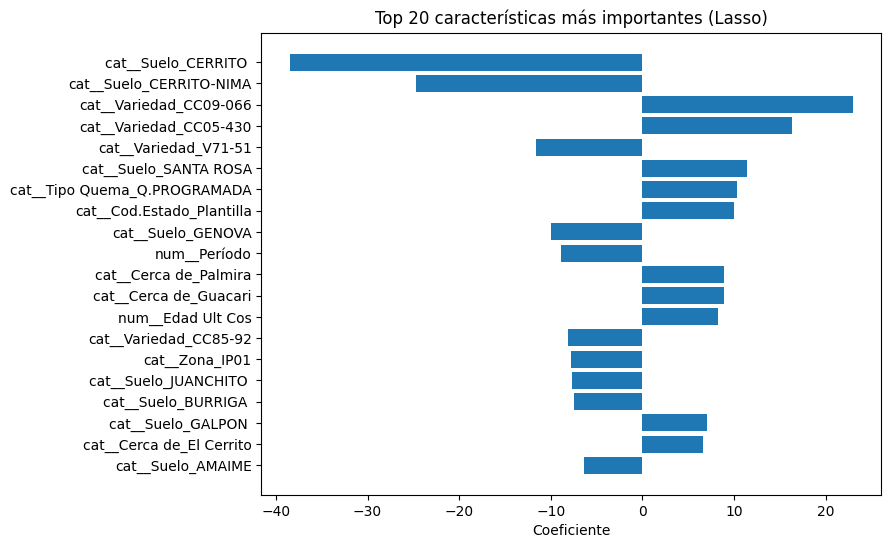


--- Características más influyentes según Ridge ---
                   Característica  Coeficiente   abs_coef
41            cat__Suelo_CERRITO    -33.435796  33.435796
70         cat__Variedad_CC09-066    22.715432  22.715432
42        cat__Suelo_CERRITO-NIMA   -21.619911  21.619911
69         cat__Variedad_CC05-430    16.787221  16.787221
58          cat__Suelo_SANTA ROSA    14.802723  14.802723
92           cat__Variedad_V71-51   -13.477903  13.477903
119       cat__Cerca de_Andalucia   -12.439110  12.439110
113  cat__Tipo Quema_Q.PROGRAMADA    11.464761  11.464761
126         cat__Cerca de_Palmira    10.605112  10.605112
46             cat__Suelo_GALPON     10.335654  10.335654
82          cat__Variedad_CC84-75    -9.386936   9.386936
105     cat__Cod.Estado_Plantilla     9.210833   9.210833
45           cat__Suelo_ESMERALDA     9.049685   9.049685
0                    num__Período    -9.018118   9.018118
111       cat__Tipo Quema_NO DEF.    -8.927610   8.927610
56            cat__

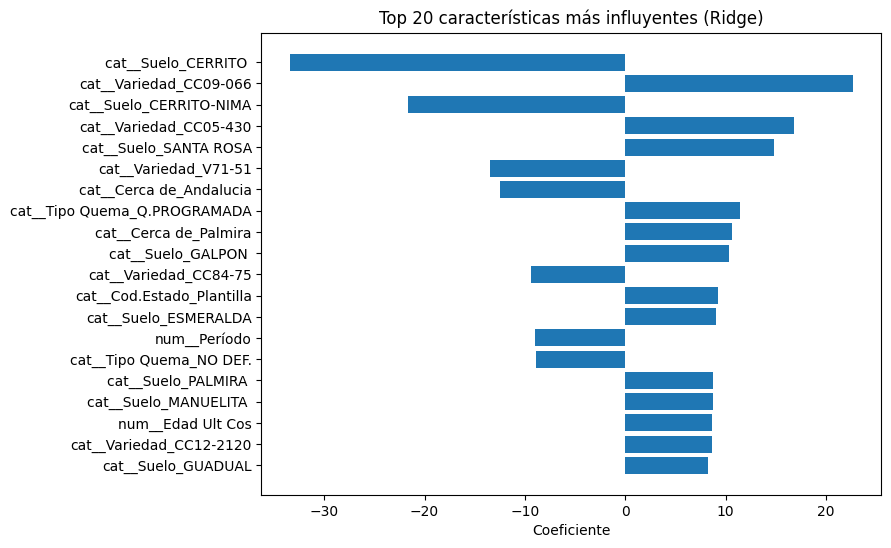

In [384]:
best_lasso_model = grid_search_lasso.best_estimator_
lasso_feature_names = best_lasso_model.named_steps['preprocessor'].get_feature_names_out()
lasso_coeffs = best_lasso_model.named_steps['regressor'].coef_

df_lasso = pd.DataFrame({
    'Característica': lasso_feature_names,
    'Coeficiente': lasso_coeffs
})

# Filtramos las que Lasso mantuvo (coef != 0)
significant_lasso = df_lasso[df_lasso['Coeficiente'] != 0] \
    .assign(abs_coef=lambda d: d['Coeficiente'].abs()) \
    .sort_values(by='abs_coef', ascending=False)

print("\n--- Características más importantes según Lasso ---")
print(significant_lasso.head(20))

# Gráfico
plt.figure(figsize=(8, 6))
plt.barh(significant_lasso.head(20)['Característica'],
         significant_lasso.head(20)['Coeficiente'])
plt.gca().invert_yaxis()
plt.title("Top 20 características más importantes (Lasso)")
plt.xlabel("Coeficiente")
plt.show()


# --- Ridge ---
best_ridge_model = grid_search_ridge.best_estimator_
ridge_feature_names = best_ridge_model.named_steps['preprocessor'].get_feature_names_out()
ridge_coeffs = best_ridge_model.named_steps['regressor'].coef_

df_ridge = pd.DataFrame({
    'Característica': ridge_feature_names,
    'Coeficiente': ridge_coeffs,
    'abs_coef': abs(ridge_coeffs)
}).sort_values(by='abs_coef', ascending=False)

print("\n--- Características más influyentes según Ridge ---")
print(df_ridge.head(20))

# Gráfico
plt.figure(figsize=(8, 6))
plt.barh(df_ridge.head(20)['Característica'],
         df_ridge.head(20)['Coeficiente'])
plt.gca().invert_yaxis()
plt.title("Top 20 características más influyentes (Ridge)")
plt.xlabel("Coeficiente")
plt.show()